## 선형 회귀 모델

### 데이터 세팅

In [155]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 
x, y

(array([2, 4, 6, 8]), array([81, 93, 91, 97]))

### 오차 함수

In [59]:
sample_a = np.arange(-1,6,0.1)
sample_b = 79

# 오차함수
misses = []
for s_a in sample_a:
    miss = np.sum((y - s_a * x - sample_b)**2)
    misses.append([s_a, miss])
misses = np.array(misses)

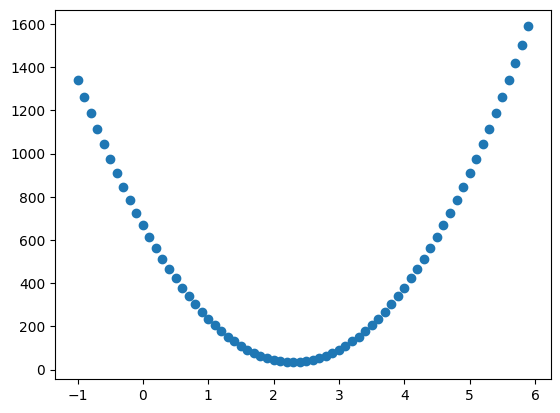

In [60]:
plt.scatter(misses[:, 0], misses[:, 1])
plt.show()

## 최소제곱법을 이용한 선형회귀(2차 함수)

In [86]:
init_a = -1
init_b = 1000
# hyperparameters (경험칙 근거)
# 학습률
learning_rate = 0.03
# 반복횟수
epochs = 1500

### 반복해가며 a 값을 조정

In [100]:
a = init_a
b = init_b
n = len(x)

result_a = []
for i in range(epochs + 1):
    error = y - (a * x + b)
    result_a.append([a, np.sum(error**2)])
    # 기울기
    diff_a = (1/n) * np.sum(-2*x * error)
    diff_b = (1/n) * np.sum(-2*error)
    # a, b 조정
    a = a - learning_rate * diff_a
    b = b - learning_rate * diff_b
    # 100번마다 현황 확인
    if i % 100 == 0:
        print("epoch : %i, 기울기 = %.04f, 절편 = %.04f" % (i, a, b))

epoch : 0, 기울기 = -271.3600, 절편 = 945.7300
epoch : 100, 기울기 = -53.6612, 절편 = 412.9522
epoch : 200, 기울기 = -18.7535, 절편 = 204.6380
epoch : 300, 기울기 = -5.6206, 절편 = 126.2670
epoch : 400, 기울기 = -0.6799, 절편 = 96.7826
epoch : 500, 기울기 = 1.1789, 절편 = 85.6901
epoch : 600, 기울기 = 1.8782, 절편 = 81.5169
epoch : 700, 기울기 = 2.1413, 절편 = 79.9469
epoch : 800, 기울기 = 2.2403, 절편 = 79.3562
epoch : 900, 기울기 = 2.2775, 절편 = 79.1340
epoch : 1000, 기울기 = 2.2916, 절편 = 79.0504
epoch : 1100, 기울기 = 2.2968, 절편 = 79.0190
epoch : 1200, 기울기 = 2.2988, 절편 = 79.0071
epoch : 1300, 기울기 = 2.2996, 절편 = 79.0027
epoch : 1400, 기울기 = 2.2998, 절편 = 79.0010
epoch : 1500, 기울기 = 2.2999, 절편 = 79.0004


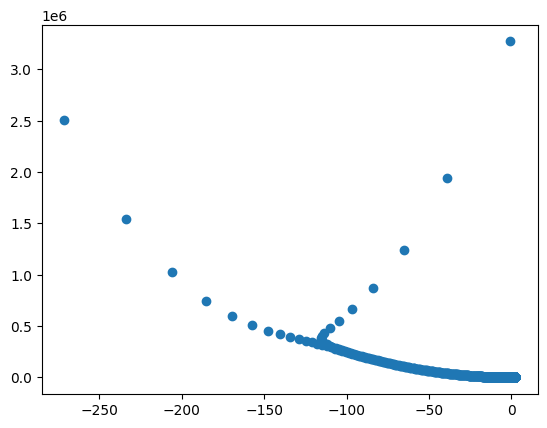

In [108]:
result_a = np.array(result_a)
plt.scatter(result_a[:, 0], result_a[:, 1])
plt.show()

## 경사하강법을 이용한 다중 선형 회귀

In [112]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97]) 
x1, x2, y

(array([2, 4, 6, 8]), array([0, 4, 2, 3]), array([81, 93, 91, 97]))

In [137]:
init_a1 = 0
init_a2 = 0
init_b = 0 
# hyperparameters (경험칙 근거)
# 학습률
learning_rate = 0.01
# 반복횟수
epochs = 2500

In [139]:
a1 = init_a1
a2 = init_a2
b = init_b
n = len(y)

for i in range(epochs + 1):
    error = y - (a1 * x1 + a2 * x2 + b)
    total_error = np.sum(error**2)
    # 기울기
    diff_a1 = (1/n) * np.sum(-2*x1 * error)
    diff_a2 = (1/n) * np.sum(-2*x2 * error)
    diff_b = (1/n) * np.sum(-2*error)
    # a, b 조정
    a1 = a1 - learning_rate * diff_a1
    a2 = a2 - learning_rate * diff_a2
    b = b - learning_rate * diff_b
    # 500번마다 현황 확인
    if i % 500 == 0:
        print("epoch : %i, total_error = %.04f,  기울기1 = %.04f, 기울기2 = %.04f 절편 = %.04f"
              % (i, total_error, a1, a2, b))

epoch : 0, total_error = 32900.0000,  기울기1 = 9.2800, 기울기2 = 4.2250 절편 = 1.8100
epoch : 500, total_error = 155.5667,  기울기1 = 3.7447, 기울기2 = 3.0608 절편 = 62.4448
epoch : 1000, total_error = 6.7590,  기울기1 = 1.9583, 기울기2 = 2.4440 절편 = 74.7103
epoch : 1500, total_error = 0.5556,  기울기1 = 1.5936, 기울기2 = 2.3180 절편 = 77.2146
epoch : 2000, total_error = 0.2970,  기울기1 = 1.5191, 기울기2 = 2.2923 절편 = 77.7260
epoch : 2500, total_error = 0.2862,  기울기1 = 1.5039, 기울기2 = 2.2871 절편 = 77.8304


# 텐서플로를 이용한 방법(1차)

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [142]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 
x, y

(array([2, 4, 6, 8]), array([81, 93, 91, 97]))

In [143]:
model = Sequential()
# 가설 세팅 - 1차함수(출력1, 입력1, 선형함수)
model.add(Dense(1, input_dim = 1, activation = 'linear'))
# 오차(평균 제곱 오차), 옵티마이저(경사 하강법) 세팅
model.compile(loss='mse', optimizer='sgd')

In [144]:
model.fit(x, y, epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 206ms/step - loss: 9635.5410
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 2242.4197
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 1151.2445
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 985.7023
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 956.1465
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 946.5977
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 940.0212
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 933.9146
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 927.9105
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 921.9544
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 916.0381
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 910.1606
Epoch 13/2000
1/1 [=

1/1 [==============================] - 0s 4ms/step - loss: 517.4819
Epoch 101/2000
1/1 [==============================] - 0s 3ms/step - loss: 514.1851
Epoch 102/2000
1/1 [==============================] - 0s 3ms/step - loss: 510.9093
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 507.6550
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 504.4216
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 501.2092
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 498.0177
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 494.8468
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 491.6964
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 488.5663
Epoch 110/2000
1/1 [==============================] - 0s 4ms/step - loss: 485.4566
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 482.3670
Epoch 112/2000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 277.6982
Epoch 199/2000
1/1 [==============================] - 0s 3ms/step - loss: 275.9539
Epoch 200/2000
1/1 [==============================] - 0s 3ms/step - loss: 274.2208
Epoch 201/2000
1/1 [==============================] - 0s 3ms/step - loss: 272.4990
Epoch 202/2000
1/1 [==============================] - 0s 3ms/step - loss: 270.7882
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 269.0887
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 267.4000
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 265.7223
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 264.0555
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 262.3994
Epoch 208/2000
1/1 [==============================] - 0s 3ms/step - loss: 260.7541
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 259.1194
Epoch 210/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 149.9103
Epoch 298/2000
1/1 [==============================] - 0s 3ms/step - loss: 148.9933
Epoch 299/2000
1/1 [==============================] - 0s 3ms/step - loss: 148.0823
Epoch 300/2000
1/1 [==============================] - 0s 3ms/step - loss: 147.1772
Epoch 301/2000
1/1 [==============================] - 0s 3ms/step - loss: 146.2780
Epoch 302/2000
1/1 [==============================] - 0s 3ms/step - loss: 145.3846
Epoch 303/2000
1/1 [==============================] - 0s 3ms/step - loss: 144.4969
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 143.6151
Epoch 305/2000
1/1 [==============================] - 0s 3ms/step - loss: 142.7389
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 141.8684
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 141.0036
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 140.1443
Epoch 309/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 82.7381
Epoch 397/2000
1/1 [==============================] - 0s 3ms/step - loss: 82.2560
Epoch 398/2000
1/1 [==============================] - 0s 3ms/step - loss: 81.7771
Epoch 399/2000
1/1 [==============================] - 0s 3ms/step - loss: 81.3014
Epoch 400/2000
1/1 [==============================] - 0s 3ms/step - loss: 80.8287
Epoch 401/2000
1/1 [==============================] - 0s 3ms/step - loss: 80.3591
Epoch 402/2000
1/1 [==============================] - 0s 3ms/step - loss: 79.8925
Epoch 403/2000
1/1 [==============================] - 0s 3ms/step - loss: 79.4290
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 78.9684
Epoch 405/2000
1/1 [==============================] - 0s 3ms/step - loss: 78.5108
Epoch 406/2000
1/1 [==============================] - 0s 3ms/step - loss: 78.0562
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 77.6045
Epoch 408/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 47.1753
Epoch 497/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.9236
Epoch 498/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.6735
Epoch 499/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.4251
Epoch 500/2000
1/1 [==============================] - 0s 4ms/step - loss: 46.1782
Epoch 501/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.9329
Epoch 502/2000
1/1 [==============================] - 0s 4ms/step - loss: 45.6893
Epoch 503/2000
1/1 [==============================] - 0s 4ms/step - loss: 45.4471
Epoch 504/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.2066
Epoch 505/2000
1/1 [==============================] - 0s 3ms/step - loss: 44.9677
Epoch 506/2000
1/1 [==============================] - 0s 3ms/step - loss: 44.7302
Epoch 507/2000
1/1 [==============================] - 0s 3ms/step - loss: 44.4944
Epoch 508/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 28.6027
Epoch 597/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.4712
Epoch 598/2000
1/1 [==============================] - 0s 4ms/step - loss: 28.3406
Epoch 599/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.2109
Epoch 600/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.0820
Epoch 601/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.9539
Epoch 602/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.8266
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.7002
Epoch 604/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.5746
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.4498
Epoch 606/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.3258
Epoch 607/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.2026
Epoch 608/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 18.9031
Epoch 697/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.8344
Epoch 698/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.7662
Epoch 699/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.6985
Epoch 700/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.6311
Epoch 701/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.5642
Epoch 702/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.4978
Epoch 703/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.4318
Epoch 704/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.3661
Epoch 705/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.3009
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.2362
Epoch 707/2000
1/1 [==============================] - 0s 4ms/step - loss: 18.1719
Epoch 708/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 13.8375
Epoch 797/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.8016
Epoch 798/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7660
Epoch 799/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7306
Epoch 800/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6954
Epoch 801/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6605
Epoch 802/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6258
Epoch 803/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5913
Epoch 804/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5571
Epoch 805/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5230
Epoch 806/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.4892
Epoch 807/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.4556
Epoch 808/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 11.1919
Epoch 897/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1732
Epoch 898/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1546
Epoch 899/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1361
Epoch 900/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1178
Epoch 901/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.0995
Epoch 902/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0814
Epoch 903/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0634
Epoch 904/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0455
Epoch 905/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0277
Epoch 906/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0100
Epoch 907/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9925
Epoch 908/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 9.8103
Epoch 997/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.8005
Epoch 998/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7908
Epoch 999/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7811
Epoch 1000/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7715
Epoch 1001/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7620
Epoch 1002/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7525
Epoch 1003/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7431
Epoch 1004/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7338
Epoch 1005/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7245
Epoch 1006/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7153
Epoch 1007/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7061
Epoch 1008/2000
1/1 [==============

1/1 [==============================] - 0s 3ms/step - loss: 9.0887
Epoch 1097/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0836
Epoch 1098/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0785
Epoch 1099/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0735
Epoch 1100/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0685
Epoch 1101/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.0635
Epoch 1102/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0585
Epoch 1103/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.0536
Epoch 1104/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.0488
Epoch 1105/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0439
Epoch 1106/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0391
Epoch 1107/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0343
Epoch 1108/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 8.7119
Epoch 1197/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7092
Epoch 1198/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7066
Epoch 1199/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7040
Epoch 1200/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7013
Epoch 1201/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.6987
Epoch 1202/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6961
Epoch 1203/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6936
Epoch 1204/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6910
Epoch 1205/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6885
Epoch 1206/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6860
Epoch 1207/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.6835
Epoch 1208/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.5151
Epoch 1297/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5137
Epoch 1298/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5123
Epoch 1299/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5110
Epoch 1300/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5096
Epoch 1301/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5082
Epoch 1302/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5069
Epoch 1303/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5055
Epoch 1304/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5042
Epoch 1305/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5029
Epoch 1306/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5016
Epoch 1307/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5003
Epoch 1308/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.4124
Epoch 1397/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4116
Epoch 1398/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4109
Epoch 1399/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4102
Epoch 1400/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4095
Epoch 1401/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4088
Epoch 1402/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4081
Epoch 1403/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4074
Epoch 1404/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4067
Epoch 1405/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.4060
Epoch 1406/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4053
Epoch 1407/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4046
Epoch 1408/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 8.3587
Epoch 1497/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3583
Epoch 1498/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3579
Epoch 1499/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3575
Epoch 1500/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3572
Epoch 1501/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3568
Epoch 1502/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3564
Epoch 1503/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3561
Epoch 1504/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3557
Epoch 1505/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3553
Epoch 1506/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3550
Epoch 1507/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3546
Epoch 1508/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 8.3306
Epoch 1597/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3304
Epoch 1598/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3302
Epoch 1599/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3300
Epoch 1600/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3299
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3297
Epoch 1602/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3295
Epoch 1603/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3293
Epoch 1604/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3291
Epoch 1605/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3289
Epoch 1606/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3287
Epoch 1607/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3285
Epoch 1608/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3160
Epoch 1697/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3159
Epoch 1698/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3158
Epoch 1699/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3157
Epoch 1700/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3156
Epoch 1701/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3155
Epoch 1702/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3154
Epoch 1703/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3153
Epoch 1704/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3152
Epoch 1705/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3151
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3150
Epoch 1707/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3149
Epoch 1708/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3083
Epoch 1797/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3083
Epoch 1798/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3083
Epoch 1799/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3082
Epoch 1800/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3082
Epoch 1801/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3081
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3080
Epoch 1803/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3080
Epoch 1804/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3079
Epoch 1805/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3079
Epoch 1806/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3078
Epoch 1807/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3078
Epoch 1808/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3044
Epoch 1897/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3043
Epoch 1898/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3043
Epoch 1899/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3043
Epoch 1900/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1901/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3042
Epoch 1902/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1903/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1904/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3041
Epoch 1905/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3041
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3041
Epoch 1907/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3041
Epoch 1908/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 1997/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 1998/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 1999/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3022
Epoch 2000/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3022


1/1 [==============================] - 0s 58ms/step


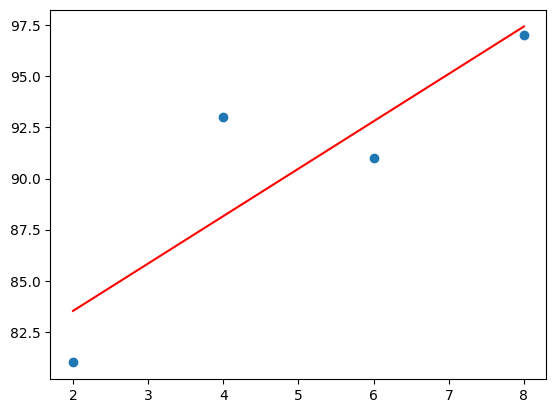

In [146]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 텐서플로를 이용한 방법(다중)

In [149]:
x = np.array([[2,0], [4,4], [6,2], [8,3]])
y = np.array([81, 93, 91, 97]) 
x, y

(array([[2, 0],
        [4, 4],
        [6, 2],
        [8, 3]]),
 array([81, 93, 91, 97]))

In [150]:
model = Sequential()
# 가설 세팅 - 1차함수(출력1, 입력2, 선형함수)
model.add(Dense(1, input_dim = 2, activation = 'linear'))
# 오차(평균 제곱 오차), 옵티마이저(경사 하강법) 세팅
model.compile(loss='mse', optimizer='sgd')

In [151]:
model.fit(x, y, epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 176ms/step - loss: 8506.5918
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 1457.8337
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 956.6271
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 915.9443
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 907.6857
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 901.7430
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 895.9980
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 890.3019
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 884.6436
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 879.0221
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 873.4373
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 867.8885
Epoch 13/2000
1/1 [==

Epoch 101/2000
1/1 [==============================] - 0s 4ms/step - loss: 492.8271
Epoch 102/2000
1/1 [==============================] - 0s 3ms/step - loss: 489.7054
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 486.6035
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 483.5212
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 480.4586
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 477.4152
Epoch 107/2000
1/1 [==============================] - 0s 3ms/step - loss: 474.3912
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 471.3862
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 468.4005
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 465.4335
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 462.4854
Epoch 112/2000
1/1 [==============================] - 0s 3ms/step - loss: 459.5559
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 264.4041
Epoch 200/2000
1/1 [==============================] - 0s 3ms/step - loss: 262.7296
Epoch 201/2000
1/1 [==============================] - 0s 3ms/step - loss: 261.0656
Epoch 202/2000
1/1 [==============================] - 0s 4ms/step - loss: 259.4123
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 257.7692
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 256.1368
Epoch 205/2000
1/1 [==============================] - 0s 4ms/step - loss: 254.5146
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 252.9027
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 251.3010
Epoch 208/2000
1/1 [==============================] - 0s 3ms/step - loss: 249.7095
Epoch 209/2000
1/1 [==============================] - 0s 4ms/step - loss: 248.1281
Epoch 210/2000
1/1 [==============================] - 0s 3ms/step - loss: 246.5567
Epoch 211/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 141.8700
Epoch 298/2000
1/1 [==============================] - 0s 3ms/step - loss: 140.9717
Epoch 299/2000
1/1 [==============================] - 0s 4ms/step - loss: 140.0791
Epoch 300/2000
1/1 [==============================] - 0s 3ms/step - loss: 139.1922
Epoch 301/2000
1/1 [==============================] - 0s 3ms/step - loss: 138.3108
Epoch 302/2000
1/1 [==============================] - 0s 3ms/step - loss: 137.4351
Epoch 303/2000
1/1 [==============================] - 0s 4ms/step - loss: 136.5649
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 135.7002
Epoch 305/2000
1/1 [==============================] - 0s 4ms/step - loss: 134.8410
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 133.9872
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 133.1389
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 132.2960
Epoch 309/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 75.6558
Epoch 397/2000
1/1 [==============================] - 0s 3ms/step - loss: 75.1771
Epoch 398/2000
1/1 [==============================] - 0s 3ms/step - loss: 74.7013
Epoch 399/2000
1/1 [==============================] - 0s 3ms/step - loss: 74.2285
Epoch 400/2000
1/1 [==============================] - 0s 3ms/step - loss: 73.7587
Epoch 401/2000
1/1 [==============================] - 0s 4ms/step - loss: 73.2919
Epoch 402/2000
1/1 [==============================] - 0s 4ms/step - loss: 72.8281
Epoch 403/2000
1/1 [==============================] - 0s 4ms/step - loss: 72.3672
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 71.9091
Epoch 405/2000
1/1 [==============================] - 0s 4ms/step - loss: 71.4540
Epoch 406/2000
1/1 [==============================] - 0s 4ms/step - loss: 71.0019
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 70.5526
Epoch 408/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 40.1058
Epoch 497/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.8522
Epoch 498/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.6001
Epoch 499/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.3497
Epoch 500/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.1009
Epoch 501/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.8536
Epoch 502/2000
1/1 [==============================] - 0s 4ms/step - loss: 38.6080
Epoch 503/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.3639
Epoch 504/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.1213
Epoch 505/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.8802
Epoch 506/2000
1/1 [==============================] - 0s 4ms/step - loss: 37.6407
Epoch 507/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.4027
Epoch 508/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 21.2762
Epoch 597/2000
1/1 [==============================] - 0s 3ms/step - loss: 21.1418
Epoch 598/2000
1/1 [==============================] - 0s 3ms/step - loss: 21.0084
Epoch 599/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.8757
Epoch 600/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.7439
Epoch 601/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.6129
Epoch 602/2000
1/1 [==============================] - 0s 4ms/step - loss: 20.4828
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.3535
Epoch 604/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.2250
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.0974
Epoch 606/2000
1/1 [==============================] - 0s 4ms/step - loss: 19.9705
Epoch 607/2000
1/1 [==============================] - 0s 4ms/step - loss: 19.8444
Epoch 608/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 11.3028
Epoch 697/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.2317
Epoch 698/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.1610
Epoch 699/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0907
Epoch 700/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0209
Epoch 701/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9515
Epoch 702/2000
1/1 [==============================] - 0s 4ms/step - loss: 10.8826
Epoch 703/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.8141
Epoch 704/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.7461
Epoch 705/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.6785
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.6113
Epoch 707/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.5445
Epoch 708/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 5.9826
Epoch 798/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9452
Epoch 799/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9080
Epoch 800/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8710
Epoch 801/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8342
Epoch 802/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.7977
Epoch 803/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.7615
Epoch 804/2000
1/1 [==============================] - 0s 4ms/step - loss: 5.7254
Epoch 805/2000
1/1 [==============================] - 0s 4ms/step - loss: 5.6896
Epoch 806/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.6540
Epoch 807/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.6186
Epoch 808/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.5835
Epoch 809/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 3.1826
Epoch 899/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1629
Epoch 900/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1433
Epoch 901/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.1238
Epoch 902/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1045
Epoch 903/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.0853
Epoch 904/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0662
Epoch 905/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.0472
Epoch 906/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0283
Epoch 907/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.0096
Epoch 908/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.9910
Epoch 909/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.9725
Epoch 910/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 1.7088
Epoch 1000/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6985
Epoch 1001/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6881
Epoch 1002/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6779
Epoch 1003/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.6677
Epoch 1004/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6576
Epoch 1005/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6476
Epoch 1006/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6376
Epoch 1007/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6277
Epoch 1008/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6178
Epoch 1009/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6080
Epoch 1010/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.5983
Epoch 1011/2000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 0.9387
Epoch 1100/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9332
Epoch 1101/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9278
Epoch 1102/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9223
Epoch 1103/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9169
Epoch 1104/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9116
Epoch 1105/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9063
Epoch 1106/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.9010
Epoch 1107/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8957
Epoch 1108/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8905
Epoch 1109/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8853
Epoch 1110/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.8802
Epoch 1111/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.5308
Epoch 1200/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5279
Epoch 1201/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5250
Epoch 1202/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5221
Epoch 1203/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5193
Epoch 1204/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5164
Epoch 1205/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5136
Epoch 1206/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5108
Epoch 1207/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5080
Epoch 1208/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5053
Epoch 1209/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5025
Epoch 1210/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4998
Epoch 1211/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3147
Epoch 1300/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 1301/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3117
Epoch 1302/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3101
Epoch 1303/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3086
Epoch 1304/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3071
Epoch 1305/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3056
Epoch 1306/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3041
Epoch 1307/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3027
Epoch 1308/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3012
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2998
Epoch 1310/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2983
Epoch 1311/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2003
Epoch 1400/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1995
Epoch 1401/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1987
Epoch 1402/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1979
Epoch 1403/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 1404/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1963
Epoch 1405/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1955
Epoch 1406/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1947
Epoch 1407/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1939
Epoch 1408/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1931
Epoch 1409/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1924
Epoch 1410/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1916
Epoch 1411/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1397
Epoch 1500/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393
Epoch 1501/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1388
Epoch 1502/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1384
Epoch 1503/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1380
Epoch 1504/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1376
Epoch 1505/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1371
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1367
Epoch 1507/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1363
Epoch 1508/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1359
Epoch 1509/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 1510/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1351
Epoch 1511/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1076
Epoch 1600/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1074
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1071
Epoch 1602/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1069
Epoch 1603/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1067
Epoch 1604/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1065
Epoch 1605/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1062
Epoch 1606/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1060
Epoch 1607/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1058
Epoch 1608/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 1609/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1054
Epoch 1610/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1051
Epoch 1611/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0906
Epoch 1700/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 1701/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0903
Epoch 1702/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0902
Epoch 1703/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0901
Epoch 1704/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 1705/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0897
Epoch 1707/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1708/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 1709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 1710/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0893
Epoch 1711/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 1800/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 1801/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0814
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 1803/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 1804/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 1805/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0812
Epoch 1806/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 1807/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 1808/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0810
Epoch 1809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch 1810/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0809
Epoch 1811/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 1900/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0768
Epoch 1901/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 1902/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 1903/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 1904/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0766
Epoch 1905/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1907/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0765
Epoch 1908/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1909/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1910/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 1911/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0743
Epoch 2000/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0743
